# Download BDTRE database from Geoportal of the Piedmont Region, Italy

**What is the BDTRE (Base Dati Territoriale di Riferimento degli Enti)?** 
<br>
From the website https://www.geoportale.piemonte.it/cms/bdtre/bdtre-2: "The Territorial Reference Database of the Bodies (BDTRE) is the geographical database of the Piedmontese territory promoted by the Piedmont Region, with the contents of a technical cartography, structured according to the - Technical rules for the definition of the content specifications of the geotopographic databases - nationally and primarily aimed at supporting the planning, governance and protection of the territory". 

From the following link: https://www.geoportale.piemonte.it/cms/bdtre/modalita-di-pubblicazione-e-fruizione it is possible to access to the different ways of using the database that in previous years of the 2021 it was possible to download by single municipality or by designing a polygonal area of limited size. Starting in 2021, they have begun to offer the possibility of downloading in an aggregate way, but still with time-consuming limitations.

**The purpose of this work is to give the possibility to download the data available on the platform through the R programming language in order to reduce the time it would take through the platform and then make the data available already in an organized mode**.

From the BDTRE it is **possible to download different geodata for each municipality** which are organized in different folders:
- **AMM**: it contains shp of the municipal boundaries both as polygon and multiline and a punctual one for the municipal offices;
- **GEOFOTO**: point shp with network vertices;
- **IDRO**: contains the shp with hydrographic data;
- **IMM**: contains multipolygonal shps of the surface of the buildings in the municipality;
- **IND**: contains both punctual and linear shps regarding street classification and house numbers;
- **ORO**: contains shp regarding the orography of the territory;
- **PERT**: contains shp regarding the division of appurtenances between buildings and between public and private land;
- **SERV**: contains shp regarding service infrastructures such as low and high voltage electricity networks;
- **TOPO**: contains data on toponymy;
- **VEG**: contains shp regarding agricultural, wooded and other types of natural areas.
- **VIAB**: contains information about road infrastructure, including roads and railways;

On the basis of the selections made by the user, the program returns in a single shp for all the territory downloaded the same categories within the previously mentioned folders.

## Install packages if necessary

In [ ]:
#install.packages("sf")

## Open the library

In [ ]:
library(progress)
library(sf)

## Get municipality identification codes

The National Institute of Statistics (ISTAT) entrusts each municipality with an identification number, the same for the province and for the regions. The BDTRE uses these numbers at the municipal level to download the data according to the one selected. 

For example for the BDTRE of the 2021: http://www.datigeo-piem-download.it/static/regp01/BDTRE2021_VECTOR/BDTRE_DATABASE_GEOTOPOGRAFICO_2021-LIMI_COMUNI_10_GAIMSDWL- **YOU CAN INSERT HERE THE NUMBER YOU NEED** -EPSG32632-SHP.zip

To automatically download the data for each municipality, the identification numbers must first be downloaded. ISTAT offers a permanent link in csv format that can be read directly in R. The following function downloads the table and extracts the information for the Piedmont region only. 

In [11]:
get_municipality_codes <- function() {
    
    # download the csv table from the ISTAT website (the link should be permanent)
    data <- read.csv("https://www.istat.it/storage/codici-unita-amministrative/Elenco-comuni-italiani.csv", 
                     header=FALSE, stringsAsFactors=FALSE, fileEncoding="latin1", sep = ';')
    
    # get new data frame with only relevant columns
    data_new <- data[, c("V1", "V3", "V5", "V7")]
    
    # rename the columns of the dataframe
    colnames(data_new) <- c("Cod_Reg", "Cod_Prov", "Cod_Mun", "Name_Mun")
    
    # delete the first row of the data frame
    data_new <- data_new[- 1, ]
    
    # get the codes just for the municipalities inside the region of the geoportal
    piemonte_municipalities <- data_new[which(data_new$Cod_Reg=='01'), ]
    piemonte_municipalities$Cod_Reg <- NULL
    
    return(piemonte_municipalities)
}



In [12]:
m_codes <- get_municipality_codes()

In [13]:
m_codes

,Cod_Prov,Cod_Mun,Name_Mun
,<chr>,<chr>,<chr>
2,001,001001,Agliè
3,001,001002,Airasca
4,001,001003,Ala di Stura
5,001,001004,Albiano d'Ivrea
6,001,001006,Almese
7,001,001007,Alpette
8,001,001008,Alpignano
9,001,001009,Andezeno
10,001,001010,Andrate


In [14]:
# get the list of provinces inside the region

unique(m_codes$Cod_Prov)

[1] "001" "002" "003" "004" "005" "006" "096" "103"

## Filter the data frame by province codes

Creation of a dataframe from which to automatically download an entire province.

In [15]:
Torino_province <- m_codes[which(m_codes$Cod_Prov=='001'), ]
Vercelli_province <- m_codes[which(m_codes$Cod_Prov=='002'), ]
Novara_province <- m_codes[which(m_codes$Cod_Prov=='003'), ]
Cuneo_province <- m_codes[which(m_codes$Cod_Prov=='004'), ]
Asti_province <- m_codes[which(m_codes$Cod_Prov=='005'), ]
Alessandria_province <- m_codes[which(m_codes$Cod_Prov=='006'), ]
Biella_province <- m_codes[which(m_codes$Cod_Prov=='096'), ]
Verbano_Cusio_Ossola_province <- m_codes[which(m_codes$Cod_Prov=='103'), ]

## Download BDTRE database for each municipality desiredù

The program based on the number of the municipality will download the corresponding data. it is possible either to use the codes of the list pre-set by province or to build your own list with the desired municipalities.

The program is built to create subfolders starting from the position where the code is made run one. It starts from the creation of a folder called "Downloaded" and the program does not create a new one in case you want to download other data for other provinces or for a list selected by the user since each time it checks if the same folder name exists.

It also creates an additional subfolder for each municipality. 

In [59]:
download_municipality <- function(municipality_number) {
    
    # create a count of the total number of municipalities to download
    total <- nrow(municipality_number)    
    counter <- 0
    
    #check if the folders already exists
    if (file.exists('Downloaded')){
        print('The "Downloaded" folder already existed')
    } else {
        dir.create("Downloaded")
    }
    
    if (file.exists(gsub(" ", "", paste('Downloaded/', deparse(substitute(municipality_number)))))){
        print(paste('The', deparse(substitute(municipality_number),' folder already existed')))
    } else {
        dir.create(gsub(" ", "", paste('Downloaded/', deparse(substitute(municipality_number)))))
    }
    
    # loop to download each municipality in the data frame 
    for (i in municipality_number$Cod_Mun){
        
        # add one to the counter so the user know at which municipality the program is. 
        counter = counter + 1
        
        # get the url for each number
        url <- gsub(" ", "", paste('http://www.datigeo-piem-download.it/static/regp01/BDTRE2021_VECTOR/BDTRE_DATABASE_GEOTOPOGRAFICO_2021-LIMI_COMUNI_10_GAIMSDWL-',i,'-EPSG32632-SHP.zip'))
        
        # create the folder for each number 
        dir <- gsub(" ", "", paste(i, '.zip'))
        
        # downalod and unzip the data for the number
        download.file(url, dir, mode="wb")
        unzip(dir, exdir = gsub(" ", "", paste('Downloaded/', deparse(substitute(municipality_number)), "/", i)))
        
        # delete the zip when unzip to the folder
        file.remove(dir)
        
        # print the number of municipalities downloaded
        print(paste("Downloaded", counter, "municipalities of", total))
    }
}

### Example of download by province

In [42]:
# reduced the number of download to 3 just to make an example. To downaload all delete Biella_province <- Biella_province[1:3,]
Biella_province <- Biella_province[1:3,]
download_municipality(Biella_province)

[1] "The \"Downloaded\" folder already existed"
[1] "Downloaded 1 municipalities of 3"
[1] "Downloaded 2 municipalities of 3"
[1] "Downloaded 3 municipalities of 3"


### Example of download by a user list 

In [134]:
download_selected_mun <- function(user_list) {
    
    user_selection <- data.frame(user_list)
    colnames(user_selection) <- c("Cod_Mun")

    return(user_selection)
}

In [135]:
# create a vector to select the desired municipalities and pass them in the fucntion

user_list <- c('003016', '005008', '006004', '002035') 

In [136]:
user_selection <- to_dataframe_selected_m(user_list)

In [137]:
download_municipality(user_selection)

[1] "The \"Downloaded\" folder already existed"


Warning message in deparse(substitute(municipality_number), " folder already existed"):
“si è prodotto un NA per coercizione”
Warning message in deparse(substitute(municipality_number), " folder already existed"):
“invalid 'cutoff' value for 'deparse', using default”


[1] "The user_selection"
[1] "Downloaded 1 municipalities of 4"
[1] "Downloaded 2 municipalities of 4"
[1] "Downloaded 3 municipalities of 4"
[1] "Downloaded 4 municipalities of 4"


## Connecting each shp inside the folders to the code using lists

The following function creates a link to each shp within the folders previously created and based on what the user wants to merge the function will search for all files corresponding to that selection.

## controllare ordine nella selection_list, controllare che anche l'ordine di come si compone il collegamento sia giusto, controllare numero progressione sia giusto

In [2]:
selection_path <- function(chosen_shp) {
    
    # get the all the paths inside the folder where program unziped the files and insert them in a list
    list_dirs <- list.dirs(path = "Downloaded", full.names = TRUE, recursive = TRUE)
    
    # create different list by filtering the path by type
    AMM_list <- grep("AMM", list_dirs, value = TRUE, fixed = TRUE)
    IDRO_list <- grep("IDRO", list_dirs, value = TRUE, fixed = TRUE)
    IMM_list <- grep("IMM", list_dirs, value = TRUE, fixed = TRUE)
    IND_list <- grep("IND", list_dirs, value = TRUE, fixed = TRUE)
    ORO_list <- grep("ORO", list_dirs, value = TRUE, fixed = TRUE)
    PERT_list <- grep("PERT", list_dirs, value = TRUE, fixed = TRUE)
    TOPO_list <- grep("TOPO", list_dirs, value = TRUE, fixed = TRUE)
    VEG_list <- grep("VEG", list_dirs, value = TRUE, fixed = TRUE)
    VIAB_list <- grep("VIAB", list_dirs, value = TRUE, fixed = TRUE)
    SERV_list <- grep("SERV", list_dirs, value = TRUE, fixed = TRUE)
    GEOFOTO_list <- grep("GEOFOTO", list_dirs, value = TRUE, fixed = TRUE)
    
    # create the lists for the last part of each path conntected to the shapefiles 
    AMM_selection <- list('/lim_com_2021.shp', '/limi_comuni_piem_2021.shp', '/sed_amm_2021.shp')
    IDRO_selection <- list('/ab_cda_vert_2021.shp', '/el_idr_vert_2021.shp', '/nd_idr_2021.shp', 
                           '/af_acq_2021.shp', '/dre_sup_2021.shp', '/ghi_nv_2021.shp', '/invaso_vert_2021.shp', 
                           '/sp_acq_vert_2021.sh')
    IMM_selection <- list('/aatt_2021.shp', '/attr_sp_2021.shp', '/cr_edf_2021.shp', '/cs_edi_2021.shp', 
                          '/edi_min_2021.shp', '/ele_cp_2021.shp', '/un_vol_2021.shp', '/argine_2021.shp', 
                          '/diga_2021.shp', '/edifc_2021.shp', '/galler_2021.shp', '/man_tr_2021.shp', 
                          '/mn_arr_2021.shp', '/mn_int_2021.shp', '/mn_ind_2021.shp', '/mn_mau_2021.shp', 
                          '/mu_sos_2021.shp', '/ponte_2021.shp', '/tralic_2021.shp', '/un_vol_2021.shp')
    IND_selection <- list('/acc_int_2021.shp', '/acc_pc_civico_tp_str_2021.shp', '/es_amm_2021.shp', 
                          '/tp_str_2021.shp')
    ORO_selection <- list('/cv_liv_class_2021.shp', '/f_nter_2021.shp', '/pt_quo_2021.shp', '/a_tras_2021.shp', 
                          '/alveo_2021.shp', '/alveo_a_2021.shp', '/cv_liv_class_2021.shp')
    PERT_selection <- list('/pe_uins_2021.shp', '/cv_aes_2021.shp', '/cv_dis_2021.shp')
    TOPO_selection <- list('/loc_sg_2021.shp', '/scr_cr_2021.shp')
    VEG_selection <- list('/ar_vrd_2021.shp', '/bosco_2021.shp', '/cl_agr_2021.shp', '/for_pc_2021.shp', 
                          '/ps_inc_2021.shp', '/a_pveg_2021.shp', '/albero_2021.shp', '/fil_al_2021.shp', 
                          '/for_pc_2021.shp')
    VIAB_selection <- list('/ac_vei_2021.shp', '/ar_vms_2021.shp', '/el_str_tp_str_2021.shp', '/el_vms_2021.shp', 
                           '/gz_str_2021.shp', '/gz_vms_2021.shp', '/iz_str_2021.shp', '/tr_str_2021.shp', 
                           '/ac_cic_2021.shp', '/ac_ped_2021.shp', '/el_fer_2021.shp', '/gz_fer_2021.shp', 
                           '/sd_fer_2021.shp')
    SERV_selection <- list('/nd_ele_2021.shp', '/tr_ele_2021.shp')
    GEOFOTO_selection <- list('/v_rete_2021.shp')
    
    # create a list with the possible selections 
    selection_list <- c('lim_com', 'limi_comuni_piem', 'sed_amm', 'ab_cda_vert', 'el_idr_vert', 'nd_idr', 'af_acq', 
                        'dre_sup', 'ghi_nv', 'invaso_vert', 'sp_acq', 'aatt', 'attr_sp', 'cr_edf', 'cs_edi', 
                        'edi_min', 'ele_cp', 'un_vol', 'argine', 'diga', 'edifc', 'galler', 'man_tr', 'mn_arr', 
                        'mn_int', 'mn_ind', 'mn_mau', 'mu_sos', 'ponte', 'tralic', 'un_vol', 'acc_int', 
                        'acc_pc_civico_tp_str', 'es_amm', 'tp_str', 'cv_liv_class', 'f_nter', 'pt_quo', 'a_tras', 
                        'alveo', 'alveo_a', 'cv_liv_class', 'pe_uins', 'cv_aes', 'cv_dis', 'loc_sg', 'scr_cr', 
                        'ar_vrd', 'bosco', 'cl_agr', 'for_pc', 'ps_inc', 'a_pveg', 'albero', 'fil_al', 'for_pc', 
                        'ac_vei', 'ar_vms', 'el_str_tp_str', 'el_vms', 'gz_str', 'gz_vms', 'iz_str', 'tr_str', 
                        'ac_cic', 'ac_ped', 'el_fer', 'gz_fer', 'sd_fer', 'nd_ele', 'tr_ele', 'v_rete')
    
    # create the new list where append all the complete path for the wanted shp
    path_shp <- c()
    
    selected_shp = chosen_shp
    
    # create the list in base of the selection
    if (selected_shp == 'lim_com') {
        # create the list to open the files in the AMM folder
        for (i in AMM_list) {
            path <- gsub(" ", "", paste(i, AMM_selection[1]))
            path_shp <- c(path_shp, path)
    }
    
    } else if (selected_shp == 'limi_comuni_piem') {
        
        for (i in AMM_list) {
            path <- gsub(" ", "", paste(i, AMM_selection[2]))
            path_shp <- c(path_shp, path)
    }
    
    } else if (selected_shp == 'sed_amm') {
        for (i in AMM_list) {
            path <- gsub(" ", "", paste(i, AMM_selection[3]))
            path_shp <- c(path_shp, path)
    }
    
        # create the list to open the files in the IDRO folder

    } else if (selected_shp == 'ab_cda_vert') {
        for (i in IDRO_list) {
            path <- gsub(" ", "", paste(i, IDRO_selection[1]))
            path_shp <- c(path_shp, path)
    }


    } else if (selected_shp == 'el_idr_vert') {
        for (i in IDRO_list) {
            path <- gsub(" ", "", paste(i, IDRO_selection[2]))
            path_shp <- c(path_shp, path)
    }   
    
    } else if (selected_shp == 'nd_idr') {
    
        for (i in IDRO_list) {
            path <- gsub(" ", "", paste(i, IDRO_selection[3]))
            path_shp <- c(path_shp, path)
    }
    
    
    } else if (selected_shp == 'af_acq') {
        for (i in IDRO_list) {
            path <- gsub(" ", "", paste(i, IDRO_selection[4]))
            path_shp <- c(path_shp, path)
    }
        
    
    } else if (selected_shp == 'dre_sup') {
        for (i in IDRO_list) {
            path <- gsub(" ", "", paste(i, IDRO_selection[5]))
            path_shp <- c(path_shp, path)
    }
        
    } else if (selected_shp == 'ghi_nv') {
        for (i in IDRO_list) {
            path <- gsub(" ", "", paste(i, IDRO_selection[6]))
            path_shp <- c(path_shp, path)
    }
    
    } else if (selected_shp == 'sp_acq') {
        for (i in IDRO_list) {
            path <- gsub(" ", "", paste(i, IDRO_selection[7]))
            path_shp <- c(path_shp, path)
    }
    
        # create the list to open the files in the IMM folder
    } else if (selected_shp == 'aatt') {
        for (i in IMM_list) {
            path <- gsub(" ", "", paste(i, IMM_selection[1]))
            path_shp <- c(path_shp, path)
    }
        
    } else if (selected_shp == 'attr_sp') {
        for (i in IMM_list) {
            path <- gsub(" ", "", paste(i, IMM_selection[2]))
            path_shp <- c(path_shp, path)
    }

    } else if (selected_shp == 'cr_edf') {   
        for (i in IMM_list) {
            path <- gsub(" ", "", paste(i, IMM_selection[3]))
            path_shp <- c(path_shp, path)
    }

    } else if (selected_shp == 'cs_edi') {
        for (i in IMM_list) {
            path <- gsub(" ", "", paste(i, IMM_selection[4]))
            path_shp <- c(path_shp, path)
    }
    
    } else if (selected_shp == 'edi_min') {
    
        for (i in IMM_list) {
            path <- gsub(" ", "", paste(i, IMM_selection[5]))
            path_shp <- c(path_shp, path)
    }


    } else if (selected_shp == 'ele_cp') {
        for (i in IMM_list) {
            path <- gsub(" ", "", paste(i, IMM_selection[6]))
            path_shp <- c(path_shp, path)
    }


    } else if (selected_shp == 'un_vol') {
        for (i in IMM_list) {
            path <- gsub(" ", "", paste(i, IMM_selection[7]))
            path_shp <- c(path_shp, path)
    }
        
    
    } else if (selected_shp == 'argine') {
        for (i in IMM_list) {
            path <- gsub(" ", "", paste(i, IMM_selection[8]))
            path_shp <- c(path_shp, path)
    }
        
    
    } else if (selected_shp == 'diga') {
        for (i in IMM_list) {
            path <- gsub(" ", "", paste(i, IMM_selection[9]))
            path_shp <- c(path_shp, path)
    }
        
    } else if (selected_shp == 'edifc') {
        for (i in IMM_list) {
            path <- gsub(" ", "", paste(i, IMM_selection[10]))
            path_shp <- c(path_shp, path)
    }
        
    } else if (selected_shp == 'man_tr') {
        for (i in IMM_list) {
            path <- gsub(" ", "", paste(i, IMM_selection[11]))
            path_shp <- c(path_shp, path)
    }
        
    } else if (selected_shp == 'mn_arr') {
        for (i in IMM_list) {
            path <- gsub(" ", "", paste(i, IMM_selection[12]))
            path_shp <- c(path_shp, path)
    }
        
    } else if (selected_shp == 'mn_int') {
        for (i in IMM_list) {
            path <- gsub(" ", "", paste(i, IMM_selection[13]))
            path_shp <- c(path_shp, path)
    }
    
    } else if (selected_shp == 'mn_ind') {
        for (i in IMM_list) {
            path <- gsub(" ", "", paste(i, IMM_selection[14]))
            path_shp <- c(path_shp, path)
    }
    
    } else if (selected_shp == 'mn_mau') {
        for (i in IMM_list) {
            path <- gsub(" ", "", paste(i, IMM_selection[15]))
            path_shp <- c(path_shp, path)
    }
    
    } else if (selected_shp == 'mu_sos') {
        for (i in IMM_list) {
            path <- gsub(" ", "", paste(i, IMM_selection[16]))
            path_shp <- c(path_shp, path)
    }
    
    } else if (selected_shp == 'ponte') {
        for (i in IMM_list) {
            path <- gsub(" ", "", paste(i, IMM_selection[17]))
            path_shp <- c(path_shp, path)
    }
    
    # create the list to open the files in the IND folder
    } else if (selected_shp == 'acc_int') {
        for (i in IND_list) {
            path <- gsub(" ", "", paste(i, IND_selection[1]))
            path_shp <- c(path_shp, path)
    }


    } else if (selected_shp == 'acc_pc_civico_tp_str') {
        for (i in IND_list) {
            path <- gsub(" ", "", paste(i, IND_selection[2]))
            path_shp <- c(path_shp, path)
    }


    } else if (selected_shp == 'es_amm') {
        for (i in IND_list) {
            path <- gsub(" ", "", paste(i, IND_selection[3]))
            path_shp <- c(path_shp, path)
    }


    } else if (selected_shp == 'tp_str') {
        for (i in IND_list) {
            path <- gsub(" ", "", paste(i, IND_selection[4]))
            path_shp <- c(path_shp, path)
    }

    # create the list to open the files in the ORO folder

    } else if (selected_shp == 'cv_liv_class') {
        for (i in ORO_list) {
            path <- gsub(" ", "", paste(i, ORO_selection[1]))
            path_shp <- c(path_shp, path)
    }


    } else if (selected_shp == 'f_nter') {
        for (i in ORO_list) {
            path <- gsub(" ", "", paste(i, ORO_selection[2]))
            path_shp <- c(path_shp, path)
    }


    } else if (selected_shp == 'pt_quo') {
        for (i in ORO_list) {
            path <- gsub(" ", "", paste(i, ORO_selection[3]))
            path_shp <- c(path_shp, path)
    }
        
    
    } else if (selected_shp == 'a_tras') {
        for (i in ORO_list) {
            path <- gsub(" ", "", paste(i, ORO_selection[4]))
            path_shp <- c(path_shp, path)
    }
    
    
    } else if (selected_shp == 'alveo') {
        for (i in ORO_list) {
            path <- gsub(" ", "", paste(i, ORO_selection[5]))
            path_shp <- c(path_shp, path)
    }
    
    } else if (selected_shp == 'alveo_a') {
        for (i in ORO_list) {
            path <- gsub(" ", "", paste(i, ORO_selection[6]))
            path_shp <- c(path_shp, path)
    }
        
    } else if (selected_shp == 'cv_liv_class') {
        for (i in ORO_list) {
            path <- gsub(" ", "", paste(i, ORO_selection[7]))
            path_shp <- c(path_shp, path)
    }
    
    
    # create the list to open the files in the PERT folder

    } else if (selected_shp == 'pe_uins') {
        for (i in PERT_list) {
            path <- gsub(" ", "", paste(i, PERT_selection[1]))
            path_shp <- c(path_shp, path)
    }
        
    
     } else if (selected_shp == 'cv_aes') {
        for (i in PERT_list) {
            path <- gsub(" ", "", paste(i, PERT_selection[2]))
            path_shp <- c(path_shp, path)
    }
        
    } else if (selected_shp == 'cv_dis') {
        for (i in PERT_list) {
            path <- gsub(" ", "", paste(i, PERT_selection[3]))
            path_shp <- c(path_shp, path)
    }


    # create the list to open the files in the TOPO folder
    } else if (selected_shp == 'loc_sg') {
        for (i in TOPO_list) {
            path <- gsub(" ", "", paste(i, TOPO_selection[1]))
            path_shp <- c(path_shp, path)
    }


    } else if (selected_shp == 'scr_cr') {
        for (i in TOPO_list) {
            path <- gsub(" ", "", paste(i, TOPO_selection[2]))
            path_shp <- c(path_shp, path)
    }

    # create the list to open the files in the VEG folder
    } else if (selected_shp == 'ar_vrd') {
        for (i in VEG_list) {
            path <- gsub(" ", "", paste(i, VEG_selection[1]))
            path_shp <- c(path_shp, path)
    }

    } else if (selected_shp == 'bosco') {
        for (i in VEG_list) {
            path <- gsub(" ", "", paste(i, VEG_selection[2]))
            path_shp <- c(path_shp, path)
    }


    } else if (selected_shp == 'cl_agr') {
        for (i in VEG_list) {
            path <- gsub(" ", "", paste(i, VEG_selection[3]))
            path_shp <- c(path_shp, path)
    }


    } else if (selected_shp == 'for_pc') {
        for (i in VEG_list) {
            path <- gsub(" ", "", paste(i, VEG_selection[4]))
            path_shp <- c(path_shp, path)
    }


    } else if (selected_shp == 'ps_inc') {
        for (i in VEG_list) {
            path <- gsub(" ", "", paste(i, VEG_selection[5]))
            path_shp <- c(path_shp, path)
    }
        
        
    } else if (selected_shp == 'a_pveg') {
        for (i in VEG_list) {
            path <- gsub(" ", "", paste(i, VEG_selection[6]))
            path_shp <- c(path_shp, path)
    }
        
    } else if (selected_shp == 'albero') {
        for (i in VEG_list) {
            path <- gsub(" ", "", paste(i, VEG_selection[7]))
            path_shp <- c(path_shp, path)
    }
    
    } else if (selected_shp == 'fil_al') {
        for (i in VEG_list) {
            path <- gsub(" ", "", paste(i, VEG_selection[8]))
            path_shp <- c(path_shp, path)
    }
    
    } else if (selected_shp == 'for_pc') {
        for (i in VEG_list) {
            path <- gsub(" ", "", paste(i, VEG_selection[9]))
            path_shp <- c(path_shp, path)
    }

    # create the list to open the files in the VIAB folder
    } else if (selected_shp == 'ac_vei') {
        for (i in VIAB_list) {
            path <- gsub(" ", "", paste(i, VIAB_selection[1]))
            path_shp <- c(path_shp, path)
    }


    } else if (selected_shp == 'ar_vms') {
        for (i in VIAB_list) {
            path <- gsub(" ", "", paste(i, VIAB_selection[2]))
            path_shp <- c(path_shp, path)
    }


    } else if (selected_shp == 'el_str_tp_str') {
        for (i in VIAB_list) {
            path <- gsub(" ", "", paste(i, VIAB_selection[3]))
            path_shp <- c(path_shp, path)
    }


    } else if (selected_shp == 'el_vms') {
        for (i in VIAB_list) {
            path <- gsub(" ", "", paste(i, VIAB_selection[4]))
            path_shp <- c(path_shp, path)
    }


    } else if (selected_shp == 'gz_str') {
        for (i in VIAB_list) {
            path <- gsub(" ", "", paste(i, VIAB_selection[5]))
            path_shp <- c(path_shp, path)
    }


    } else if (selected_shp == 'gz_vms') {
        for (i in VIAB_list) {
            path <- gsub(" ", "", paste(i, VIAB_selection[6]))
            path_shp <- c(path_shp, path)
    }


    } else if (selected_shp == 'iz_str') {
        for (i in VIAB_list) {
            path <- gsub(" ", "", paste(i, VIAB_selection[7]))
            path_shp <- c(path_shp, path)
    }


    } else if (selected_shp == 'tr_str') {
        for (i in VIAB_list) {
            path <- gsub(" ", "", paste(i, VIAB_selection[8]))
            path_shp <- c(path_shp, path)
    }
    
    
    } else if (selected_shp == 'ac_cic') {
        for (i in VIAB_list) {
            path <- gsub(" ", "", paste(i, VIAB_selection[9]))
            path_shp <- c(path_shp, path)
    }
    
        
    } else if (selected_shp == 'ac_ped') {
        for (i in VIAB_list) {
            path <- gsub(" ", "", paste(i, VIAB_selection[10]))
            path_shp <- c(path_shp, path)
    }
    
    } else if (selected_shp == 'el_fer') {
        for (i in VIAB_list) {
            path <- gsub(" ", "", paste(i, VIAB_selection[11]))
            path_shp <- c(path_shp, path)
    }
        
    } else if (selected_shp == 'gz_fer') {
        for (i in VIAB_list) {
            path <- gsub(" ", "", paste(i, VIAB_selection[12]))
            path_shp <- c(path_shp, path)
    }

    } else if (selected_shp == 'sd_fer') {
        for (i in VIAB_list) {
            path <- gsub(" ", "", paste(i, VIAB_selection[13]))
            path_shp <- c(path_shp, path)
    }

    # create the list to open the files in the SERV folder
    } else if (selected_shp == 'nd_ele') {
        for (i in SERV_list) {
            path <- gsub(" ", "", paste(i, SERV_selection[1]))
            path_shp <- c(path_shp, path)
    }
    
    } else if (selected_shp == 'tr_ele') {
        for (i in SERV_list) {
            path <- gsub(" ", "", paste(i, SERV_selection[2]))
            path_shp <- c(path_shp, path)
    }

    # create the list to open the files in the GEOFOTO folder
    } else if (selected_shp == 'v_rete') {
        for (i in GEOFOTO_list) {
            path <- gsub(" ", "", paste(i, GEOFOTO_selection[1]))
            path_shp <- c(path_shp, path)
    }
    
    } else {print('Wrong selection')}
    
    return(path_shp)
}

## Function for merging the selected shp

The function combines all the shps inside the downloaded folder for the selection made by the user.

In [138]:
merging_shp <- function(chosen_shp) {
    
    path_shp <- selection_path(chosen_shp)
    
    nc <- st_read(path_shp[1])
    nc2 <- st_read(path_shp[2])
    nc_merge <- rbind(nc, nc2)
    path_shp_clean1 <- path_shp[-1]
    path_shp_clean <- path_shp[-1]
    
    for (i in path_shp) {
        nc <- st_read(i)
        nc_merge <- rbind(nc, nc_merge)
}
    
    return(nc_merge)
}

**The user can make a selection based on the following possibilities**: 
- 'lim_com': linear shp for municipal boundaries,
- 'limi_comuni_piem': polygonal shp for municipal boundaries
- 'sed_amm': punctual shp for administrative headquarters of Regions, a large area organizations and municipalities,
- 'ab_cda_vert': polygonal shp for wet areas of stream,
- 'el_idr_vert': linear shp for water elements, 
- 'nd_idr': punctual shp for water nodes,
- 'aatt': polygonal shp for equipped areas of the soil,
- 'attr_sp': polygonal shp for sports equipments,
- 'cr_edf': polygonal shp for the cr_edf (built-up area) specifies the association between volume units and built-up area,
- 'cs_edi': polygonal shp for built building boxes,
- 'edi_min': polygonal shp for minor building, 
- 'ele_cp': polygonal shp for cover elements, 
- 'un_vol': polygonal shp for volumetric units (elementary volume referred to a building),
- 'acc_int': punctual shp for internal access,
- 'acc_pc_civico_tp_str': punctual shp that derives from the union (join) of the CIVICO, ACC_PC (point geometry) and TP_STR (Street name, location) classes and provides the relative information
- 'es_amm': linear shp for extended administrative (defines the characteristics of the road infrastructure according to administrative criteria),
- 'tp_str': linear shp for street toponyms,
- 'cv_liv_class': linear shp for level curves,
- 'f_nter': polygonal shp for natural shape of the soil,
- 'pt_quo': punctual shp for quoted points,  
- 'pe_uins': polygonal shp for the settlement units,
- 'loc_sg': punctual shp for significant locations, 
- 'scr_cr': punctual shp for points of reference, 
- 'ar_vrd': polygonal shp for green areas,
- 'bosco': polygonal shp for woods, 
- 'cl_agr': polygonal shp for agricultural cultivations,
- 'for_pc': polygonal shp for particular training
- 'ps_inc': polygonal shp for pasture or uncultivated areas,
- 'ac_vei': polygonal shp for vehicular circulation areas,
- 'ar_vms': polygonal shp for mixed secondary roads system,
- 'el_str_tp_str': linear shp for road elements,
- 'el_vms': linear shp for secondary mixed traffic elements,
- 'gz_str': punctual shp for road junctions,
- 'gz_vms': punctual shp for road junctions of mixed secondary roads,
- 'iz_str': punctual shp for road intersections,
- 'tr_str': linear shp for road section

In [139]:
nc_merge <- merging_shp("limi_comuni_piem")

Reading layer `limi_comuni_piem_2021' from data source `/Users/magio94/Dropbox/Master of Science in Geospatial Technologies/Corsi Muenster/Spatial Data Science with R/Project/Downloaded/Alessandria_province/006001/AMM/limi_comuni_piem_2021.shp' using driver `ESRI Shapefile'
Simple feature collection with 1 feature and 25 fields
Geometry type: POLYGON
Dimension:     XYZ
Bounding box:  xmin: 453161.9 ymin: 4942747 xmax: 461343.1 ymax: 4951009
z_range:       zmin: 0 zmax: 0
Projected CRS: WGS 84 / UTM zone 32N
Reading layer `limi_comuni_piem_2021' from data source `/Users/magio94/Dropbox/Master of Science in Geospatial Technologies/Corsi Muenster/Spatial Data Science with R/Project/Downloaded/Alessandria_province/006002/AMM/limi_comuni_piem_2021.shp' using driver `ESRI Shapefile'
Simple feature collection with 1 feature and 25 fields
Geometry type: POLYGON
Dimension:     XYZ
Bounding box:  xmin: 503664.7 ymin: 4948046 xmax: 512415 ymax: 4952629
z_range:       zmin: 0 zmax: 0
Projected CRS

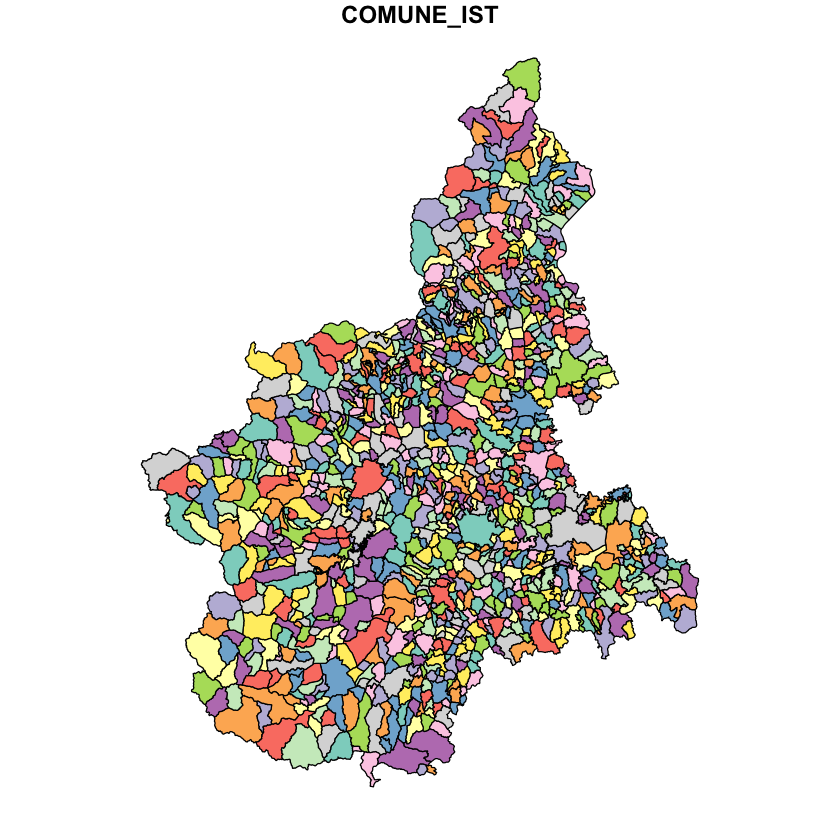

In [140]:
plot(nc_merge[10])